In [2]:
# 导入模块
%matplotlib inline
import torch
import numpy as np
import pylab as pl
from torch import nn

In [15]:
# 验证单纯通过改变张量形状，无法增加神经网络拟合能力
np.random.seed(1)
X = np.random.randint(0,10,[2,3,4])
W = np.random.randint(0,10,[3,4,5])
print('X=\n{}'.format(X))
print('W=\n{}'.format(W))
print('X.W=\n{}'.format(np.tensordot(X,W,[[1,2],[0,1]])))

X1 = X.reshape([2,-1])
W1 = W.reshape([-1,5])
print('X1=\n{}'.format(X1))
print('W1=\n{}'.format(W1))
print('X1.W1=\n{}'.format(np.tensordot(X1,W1,[[-1],[0]])))

X=
[[[5 8 9 5]
  [0 0 1 7]
  [6 9 2 4]]

 [[5 2 4 2]
  [4 7 7 9]
  [1 7 0 6]]]
W=
[[[9 9 7 6 9]
  [1 0 1 8 8]
  [3 9 8 7 3]
  [6 5 1 9 3]]

 [[4 8 1 4 0]
  [3 9 2 0 4]
  [9 2 7 7 9]
  [8 6 9 3 7]]

 [[7 4 5 9 3]
  [6 8 0 2 7]
  [7 9 7 3 0]
  [8 7 7 1 1]]]
X.W=
[[317 337 262 312 294]
 [340 356 266 213 291]]
X1=
[[5 8 9 5 0 0 1 7 6 9 2 4]
 [5 2 4 2 4 7 7 9 1 7 0 6]]
W1=
[[9 9 7 6 9]
 [1 0 1 8 8]
 [3 9 8 7 3]
 [6 5 1 9 3]
 [4 8 1 4 0]
 [3 9 2 0 4]
 [9 2 7 7 9]
 [8 6 9 3 7]
 [7 4 5 9 3]
 [6 8 0 2 7]
 [7 9 7 3 0]
 [8 7 7 1 1]]
X1.W1=
[[317 337 262 312 294]
 [340 356 266 213 291]]


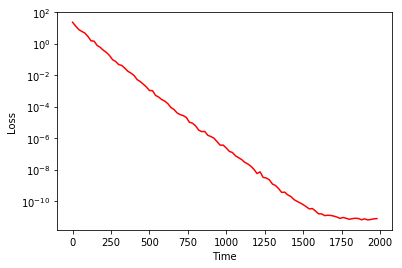

In [220]:
class Linear_DIY():
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weight = nn.Parameter(torch.randn(input_size, output_size)) # W
        self.bias = nn.Parameter(torch.randn(output_size)) # B
    def __call__(self, x):
        self.input = x
        self.output = torch.mm(self.input,self.weight)
        self.output += self.bias.unsqueeze(0).expand_as(self.output)
        return self.output
    def step(self, lr=1e-3):
        self.weight.data -= lr * self.weight.grad
        self.bias.data -= lr * self.bias
        self.weight.grad.data.zero_()
        self.bias.grad.data.zero_()
        
lr = 1e-2
batch_size = 5
input_size = 10
output_size = 2
data_size = 500

torch.manual_seed(1)
np.random.seed(1)

x_data = torch.randn(data_size,input_size) # the x dataset
W = torch.randn(input_size,output_size)
y_data = torch.mm(x_data,W)

linear = Linear_DIY(input_size, output_size)

Losses = []
for epoch in range(2000):
    sample_indices = np.random.randint(0,data_size,batch_size)
    x = x_data[sample_indices]
    x = linear(x)
    y = y_data[sample_indices]
    loss = torch.mean((x-y)**2)
    loss.backward()
    Losses.append(loss.detach().tolist())
    linear.step(lr=lr)
window_size = 20
pl.plot(np.arange(0,len(Losses),window_size),torch.mean(torch.reshape(torch.Tensor(Losses),[-1,window_size]),1).numpy(),'r-')
pl.xlabel('Time')
pl.ylabel('Loss')
pl.yscale('log')

In [ ]:
# 定义一个线性层
class Linear(nn.Module):
    def __init__(self, input_features, output_features, bias=True):
        super(Linear, self).__init__()
        self.input_features = input_features
        self.output_features = output_features

        # nn.Parameter 
        self.weight = nn.Parameter(torch.Tensor(output_features, input_features))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(output_features))
        else:
            # You should always register all possible parameters, but the
            # optional ones can be None if you want.
            self.register_parameter('bias', None)

        # Not a very smart way to initialize weights
        self.weight.data.uniform_(-0.1, 0.1)
        if bias is not None:
            self.bias.data.uniform_(-0.1, 0.1)

    def forward(self, input):
        # See the autograd section for explanation of what happens here.
        return LinearFunction.apply(input, self.weight, self.bias)

    def extra_repr(self):
        # (Optional)Set the extra information about this module. You can test
        # it by printing an object of this class.
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )

In [171]:
x_data.requires_grad

False

In [214]:
torch.mean(torch.reshape(torch.Tensor(Losses),[window_size,-1]),1).shape

torch.Size([200])

In [20]:
a.grad

In [22]:
b = torch.sum(a)

In [27]:
b.backward()

In [29]:
a.grad.data.zero_()

tensor([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]])

In [31]:
x_data = torch.randn(100,10)

In [32]:
x_data[np.random.randint(0,100,5)]

tensor([[ 0.5418, -1.5118,  1.1310, -0.5941, -0.1490,  0.1023, -0.4835,
         -0.8586, -0.8997,  0.2854],
        [-0.2442, -0.9765,  0.5358,  0.0370,  0.3044, -0.1317,  0.3825,
          0.6634,  1.6009, -0.2887],
        [ 1.6816, -1.1816, -1.0198,  1.5299,  0.0891,  1.7567,  1.3223,
         -1.1961,  0.9497, -0.4836],
        [ 0.5418, -1.5118,  1.1310, -0.5941, -0.1490,  0.1023, -0.4835,
         -0.8586, -0.8997,  0.2854],
        [ 1.8496, -0.0713, -1.8360,  1.2925,  0.7194, -1.2576,  2.0982,
          0.1098,  0.2515, -0.0661]])

In [213]:
len(np.arange(0,len(Losses),window_size))

10